# Logic and math puzzles

## Divisibility

If `a` divides `b` if and only if `b % a == 0`, with `b >= 2`. This also means that the exponents of the prime factors of `b` are less than or equal to the exponents of the prime factors of `a`.

For example, if `a = 4` and `b = 12`, then the exponents of the prime factors of `a` are 2 and 0 (for the prime numbers 2 and 3), which are both less than or equal to the prime factors of `b`, which are 2 and 1 (for the prime numbers 2 and 3). 

### Greatest common divisor
The greatest common divisor of two numbers x and y, is made up of primes with exponents that are the minimum of the exponents of the two numbers x and y. That way, the greatest common divisor has the greatest possible exponents (equal to one or both of the exponents) of the two numbers a and b, while still meeting the divisibility condition described above. 

### Least common multiple
The least common multiple of a and b is defined similarly, made up of primes with exponents that are the as small as possible, but still greater than or equal to the exponents of a and b. That is, the least common multiple is made up of primes with exponents that are the maximum of the exponents of the two numbers x and y. 

These two facts show that the least common multiple multipled by the greatest common divisor of two numbers a and b is equal to a multipled by b. 

### Check for primality

A brute force way to check if a number `n` is prime is to iterate through all numbers from 2 to the square root of `n` and check if each `n % number == 0`. 

The square root because if $a  b = n$ and $a > \sqrt n$, then $b < \sqrt n$. Therefore, we don't need to check integers greater than the square root of the number because we would have already checked their multiplicative complement. 

#### The sieve of Eratosthenes
Another way is to generate a list of primes, which is where the Sieve of Eratosthenes comes in. 
Generate the sieve up to and including the max_int and check if the number is the last number in the sieve. If so, return true. 


In [ ]:
def prime_sieve(max_int: int) -> list:
    """Very efficiently generates a list of prime numbers up to and including the `max_int`."""
    flags = [True if i % 2 == 1 else False for i in range(max_int + 1)]
    flags[:3] = (False, False, True)
    max_check = int((max_int + 1) ** 0.5) + 1
    for i in range(3, max_check, 2):
        # If flags[i] exists, then i is prime
        if flags[i]:
            # Cross off remaining multiples of the prime number i
            # We can start with i * i, because if we started with i * k where
            # k < i, then we would have already crossed this off in k's iteration. 
            for current_i in range(i * i, max_int + 1, i):
                flags[current_i] = False
    return [i for i in range(max_int + 1) if flags[i]]

In [260]:
def check_primality(num):
    """Returns whether or not a given number is prime."""
    return num == prime_sieve(num)[-1]

In [270]:
print(check_primality(319))
print(check_primality(2017))

False
True


In [273]:
%%time
# Generate all the prime numbers up to and including 100 million
a = prime_sieve(100 * 1000 * 1000)

CPU times: user 29.1 s, sys: 1.4 s, total: 30.5 s
Wall time: 32.1 s


In [274]:
len(a) / (100 * 1000 * 1000)

0.05761455

In [275]:
def get_percentages(prime_list):
    current_idx = 0
    num_prime = 1
    p = list()
    for i in range(2, prime_list[-1] + 1):
        if i >= prime_list[current_idx + 1]:
            current_idx += 1
            num_prime += 1
        p.append(num_prime / i)
    return p

In [276]:
p = get_percentages(a)
p.insert(0, None)

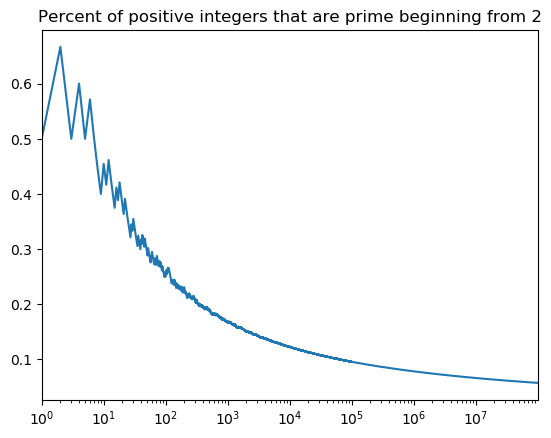

In [279]:
import matplotlib.pyplot as plt
plt.style.use('default')
every = 100_000
plt.plot(list(range(1, every+1)) + list(range(every, len(p), 500)), p[1:every+1] + p[every::500])
plt.xscale('log')
plt.xlim(1, len(p))
plt.title('Percent of positive integers that are prime beginning from 2')
plt.show()

## Probability

$P(A \cap B) = P(A | B) \,\, P(B)$

Likewise, 

$P(A \cap B) = P(B | A) \,\, P(A)$

Clearly,

$P(A | B) \,\, P(B) = P(B | A) \,\, P(A)$

Rearranging we get: 

$P(A | B) \,\,  = \frac{P(B | A) \,\, P(A)}{P(B)}$

Thus proving Bayes' theorem.

Also,

$P(A \cup B) = P(B) + P(A) - P(A \cap B)$

Because the intersection is counted twice, we need to subtract it. 

### Independence

Events A and B are independent if $P(A \cap B) = P(A) \, P(B)$

This is true when $P(A) = P(A | B)$, meaning that B indicates nothing about A. 

For example, the outcomes of two coinflips are independent, the probability of one coinflip coming up heads (A) does not change given that the other coinflip came up heads (B). 

### Mutual exclusivity

Events A and B are mutually exclusive if $P(A \cup B) = P(B) + P(A)$, meaning that the probability of A and B is zero. 

Two events **cannot** be both independent and mutually exclusive, with the exception being that one or both have a probability of 0. This is because if two events are mutually exlcusive, then if one happens, the other cannot happen. One event says something about the other. But then the events wouldn't be independent, leading to a contradiction. 

### Brain teaser 1

*You have two ropes, and each takes exactly one hour to burn. How would you use them to time exactly 15 minutes? Note that the ropes are of uneven densities, so half the rope length-wise does not necessarily take half an hour to burn.*

If you light the rope at some point between the two ends then:

The time that it took one end to burn plus the time it took the other end to burn is one hour.

What if you light both ends of one rope? It will finish burning in 30 minutes. 

Because, if it took any longer, let's say it took 40 minutes, that means that it took more than 40 minutes to burn the left side of where the two fires met, and 40 minutes to burn the right side, so if you started from end end, it would take 1 hour and 20 minutes. 

Likewise, if it took any shorter, say it took 20 minutes, then it took 20 minutes to burn the left side and the right side, meaning starting from one end, the rope would finish burning in 40 minutes. 

So we've cut the time in half, we probably need the other rope otherwise they wouldn't have provided it in the problem. 

What we could do is, when we have the first rope burning, as soon as it finishes burning, we know 30 minutes have passed by. We can take advantage of this by lighting one end of the second rope just as we light the two ends of the first rope. As soon as the first rope stops burning, we put out the fire in the second rope. Now we know we have 30 minutes left in our second rope. 

To time 15 minutes, we need only light both ends of the second rope (after cutting off the previously burnt part). We know we will get half of 30 minutes, which is 15 minutes. 

### Brain teaser 2

*You have nine balls. Eight are of the same weight, and one is heavier. You are given a balance which tells you only whether the left side or the right side is heavier. Find the heavy ball in just two uses of the scale.*

Weigh three of the balls on one side of the scale and three of the balls on the other side. 

**Case 1**
* If the scale is equally balanced, then the heavy ball is one of the three set aside. 

**Case 2** 
* If one side of the scale is lower than the other, then the heavy ball is one of the three on the lower side of the scale

In either case, we have three balls any of which could be the heavy one, and six balls that we know are not the heavy one. 

We can follow a similar procedure. 

Set aside one of the three balls and put each of the remaining two on either side of the scale. 

**Case 1**
* If the scale is equally balanced, then the heavy ball is one of the three set aside.

**Case 2**
* If one side of the scale is lower than the other, then the heavy ball is the ball on that side. 

In either case, we have found our heavy ball.

There's a general rule that we used, but may have overlooked:

*Given $N$ balls, where $N$ is divisible by 3, one use of the scale will point us to a set of $\frac{x}{3}$ balls with the heavy ball.*